### 덧셈

In [1]:
class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return self.x + self.y
    
    def backward(self): # 위의 덧셈을 미분.
        dx = 1
        dy = 1
        
        return dx, dy

In [3]:
add = Add()
add.forward(10, 3)

13

In [4]:
add.backward()

(1, 1)

### 곱셈

In [16]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        
        return self.x * self.y
    
    def backward(self):
        dx = self.y
        dy = self.x
        
        return dx, dy

In [17]:
multiply = Multiply()
multiply.forward(10, 3)

30

In [18]:
multiply.backward()

(3, 10)

### 지수

In [19]:
import numpy as np

class Exp:
    def forward(self, x):
        self.x = x
        
        return np.exp(self.x)
    
    def backward(self):
        dx = np.exp(self.x)
        
        return dx

In [22]:
exp = Exp()
exp.forward(1)

2.718281828459045

In [23]:
exp.backward()

2.718281828459045

### 역수- reciprocal

In [24]:
class Flip:
    def forward(self, x):
        self.x = x
        
        return 1 / self.x
    
    def backward(self):
        dx = -1.0 / (self.x ** 2)
        
        return dx

In [26]:
flip = Flip()
flip.forward(2)

0.5

In [27]:
flip.backward()

-0.25

### Case1

$$f(x,y) = e^{(3x + y)}$$
$$\frac{\partial}{\partial x}(x,y) = 3e^{(3x+y)}$$

In [28]:
def case1(x, y):
    z = (3 * x + y)
    z = np.exp(z)
    
    return z

In [29]:
case1(1, -2)

2.718281828459045

In [30]:
def dx_case1(x, y):
    z = (3 * x + y)
    z = np.exp(z)
    z = 3 * z
    
    return z

In [31]:
dx_case1(1, -2)

8.154845485377136

In [32]:
# 0) x
# 1) 3 * x => Multiply
# 2) 3 * x + y => Add
# 3) e ^ (3 * x + y) => Exp

In [33]:
multiply = Multiply()
add = Add()
xep = Exp()

In [34]:
x = 1
y = -2

In [38]:
forward1 = multiply.forward(x, 3)  # 1) 3 * x => Multiply
forward2 = add.forward(forward1, y)  # 2) 3 * x + y => Add
forward3 = exp.forward(forward2)  # 3) e ^ (3 * x + y) => Exp

forward3

2.718281828459045

In [41]:
backward1 = exp.backward()  # 3) e ^ (3 * x + y) => Exp
backward2 = backward1 * add.backward()[0]  # 2) 3 * x + y => Add  # [1] : dy, [0] : dx
backward3 = backward2 * multiply.backward()[0]  # 1) 3 * x => Multiply

backward3

8.154845485377136

### Case2 - Sigmoid

$$f(x) = \frac{1}{1 + e^{-x}}$$
$$f'(x) = f(x) (1 - f(x))$$

In [ ]:
# 0) x
# 1) -1.0 x => Multiply
# 2) exp ^ (-1.0 * x) => Exp
# 3) 1 + exp ^ (-1.0 * x) => Add
# 4) 1 /1 + exp ^ (-1.0 * x) => Flip

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

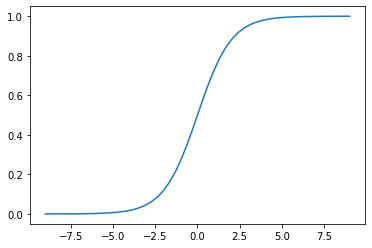

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

xx = np.linspace(start = -9, stop = +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [48]:
def dsigmoid(x):  # sigmoid 미분
    return sigmoid(x) * (1 - sigmoid(x))

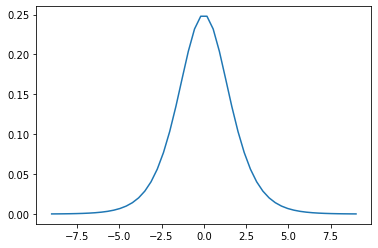

In [52]:
xx = np.linspace(start = -9, stop = +9)
yy = dsigmoid(xx)

plt.plot(xx, yy)

In [53]:
sigmoid(1)

0.7310585786300049

In [54]:
dsigmoid(1)

0.19661193324148185

In [ ]:
# 0) x
# 1) -1.0 x => Multiply
# 2) exp ^ (-1.0 * x) => Exp
# 3) 1 + exp ^ (-1.0 * x) => Add
# 4) 1 /1 + exp ^ (-1.0 * x) => Flip

In [55]:
multiply = Multiply()
exp = Exp()
add = Add()
filp = Flip()

In [62]:
x = 1

forward1 = multiply.forward(x, -1.0)  # 1) -1.0 x => Multiply
forward2 = exp.forward(forward1)  # 2) exp ^ (-1.0 * x) => Exp
forward3 = add.forward(forward2, 1)  # 3) 1 + exp ^ (-1.0 * x) => Add
forward4 = flip.forward(forward3)  # 4) 1 /1 + exp ^ (-1.0 * x) => Flip

forward4

0.7310585786300049

In [65]:
backward1 = flip.backward()
backward2 = backward1 * add.backward()[0]
backward3 = backward2 * exp.backward()
backward4 = backward3 * multiply.backward()[0]

backward4

0.19661193324148188